### tests :

We would like to know why the algorithm calculates a lot of states near the intermediary states. 

Ideas: 
   - plot the fidelity towards the intermediary state. We will have 3 plots in the case where we have 
    3 intermediary states.
    
   - plot $\lambda$ vs time

In this notebook, we are searching a usecase for intermediary states. This mean that we would like to find a trajectory with intermediary states that follows the geodesic in a better way than a continuos trajectory

## Setup 3 with Python code

Without and with intermediary states.
At the end, one will find the plots comparing both results.

In [1]:
# libraries
import numpy as np
import matplotlib as mpl
from matplotlib import cm
#from sympy.solvers import solve
#from sympy import Symbol
#
#from scipy.optimize import minimize
#from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d

import qutip


from contrlwgeo import geodesic
from contrlwgeo import fidelity
from contrlwgeo.pauli_mat_vec import *
from contrlwgeo.utils import delete_less_than_k
from contrlwgeo.controlSetup3 import control1setup3,control1setup3_int_states
from contrlwgeo.getTimeFidelity import get_time_fidelity


%matplotlib widget
#

Control activated and ready to use


In [2]:
## this cell is to have nice plots
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# test
#vect1= np.array([0.0,0.0,0.99])
#vect2= np.array([0.99,0.0,0.0])
#geodesic(0.5,vect1,vect2)

In [4]:
# Test values
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = np.array([0.0, 0.0, 0.99])
qssf = np.array([0.99, 0.0, 0.0])
w0 = 5.0
gamma_0 = 0.01
gamma_c = 10
Nmax = 40
imax = 7
deltat = 0.0030

# Save initial and final states
auxri = qsri
auxsf = qssf

In [5]:
## testing cell
estadoslist, tiempolists, solution, vec_lambda = control1setup3(qsri,qssf,Nmax=Nmax,deltat=deltat)
#tiempolists
#vec_lam
estadoslist

[array([0.  , 0.  , 0.99]),
 array([5.93529235e-02, 8.90618950e-04, 9.88218749e-01]),
 array([0.11842435, 0.00355335, 0.98288449]),
 array([0.17693667, 0.00795307, 0.97402586]),
 array([0.23461739, 0.01402732, 0.9616907 ]),
 array([0.29120184, 0.02168681, 0.94594603]),
 array([0.34643582, 0.03081617, 0.92687808]),
 array([0.40007837, 0.04127485, 0.90459227]),
 array([0.45190434, 0.05289835, 0.87921307]),
 array([0.50170702, 0.06549958, 0.85088396]),
 array([0.54930057, 0.07887052, 0.81976714]),
 array([0.59452222, 0.09278394, 0.78604334]),
 array([0.63723438, 0.10699545, 0.74991147]),
 array([0.67732633, 0.12124554, 0.71158837]),
 array([0.71471562, 0.13526184, 0.6713085 ]),
 array([0.74934908, 0.14876145, 0.62932383]),
 array([0.78120342, 0.16145338, 0.58590385]),
 array([0.81028524, 0.17304106, 0.54133587]),
 array([0.83663062, 0.18322512, 0.49592584]),
 array([0.86030409, 0.19170635, 0.44999952]),
 array([0.881397  , 0.19818921, 0.40390441]),
 array([0.90002521, 0.20238602, 0.358012

In [6]:
## testing cell

finalestados, finaltiempotot, list_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
###
# take account that the bigger imax the better the fidelity. But the improvement in the fidelity 
# is very small



Find time with fidelity
New quantum state [9.88786967e-01 9.09055696e-04 5.42920903e-04]
Find time with fidelity
New quantum state [9.88788397e-01 4.18081443e-04 5.85767387e-04]
Find time with fidelity
New quantum state [9.88788969e-01 1.77203685e-04 6.06808023e-04]
Find time with fidelity
New quantum state [9.88789219e-01 5.87934132e-05 6.17150773e-04]
Find time with fidelity
New quantum state [9.88789335e-01 5.33117467e-07 6.22238959e-04]
Find time with fidelity
New quantum state [ 9.88789391e-01 -2.81424581e-05  6.24743126e-04]
Find time with fidelity
New quantum state [ 9.88789417e-01 -4.22606101e-05  6.25975966e-04]


In [7]:
list(finalestados[30])[1]

0.10473356249800034

In [8]:
list_lambda_time

[1416.60931142056,
 1417.85676421524,
 1417.80796747486,
 1417.62567912874,
 1417.49787246000,
 1417.42575856871,
 1417.38802548478]

In [9]:
# radius
radius = [np.sqrt((finalestados[i][0])**2+(finalestados[i][1])**2+(finalestados[i][2])**2) for i in range(len(finalestados))]
listfidelities=[fidelity(finalestados[i],qssf) for i in range(len(finalestados))]

In [10]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,50],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(finalestados)):
    b.add_points(finalestados[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,qsri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,50],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.

    newbloch.add_points(vectorgeo[i],'s')

In [11]:
#Mayavi is not working
#b3d = qutip.Bloch3d()
#b3d.show()



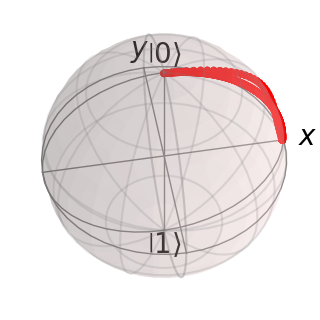

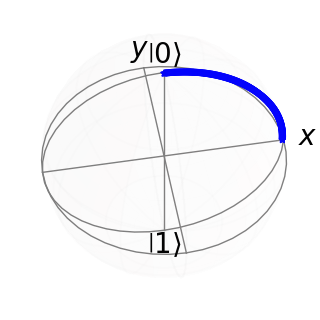

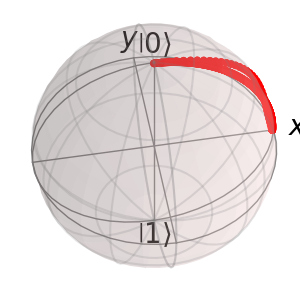

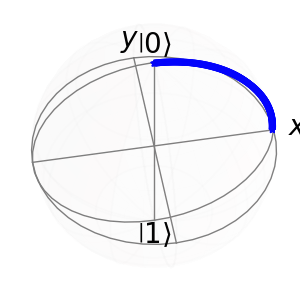

In [12]:
#improve plots

b.show()
newbloch.show()

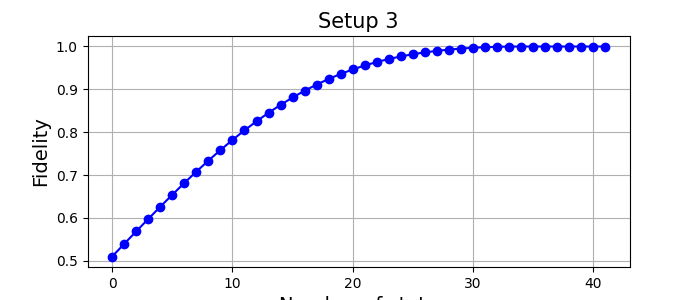

In [13]:
# data
xaxis = [i for i in range(len(finalestados))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelities, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

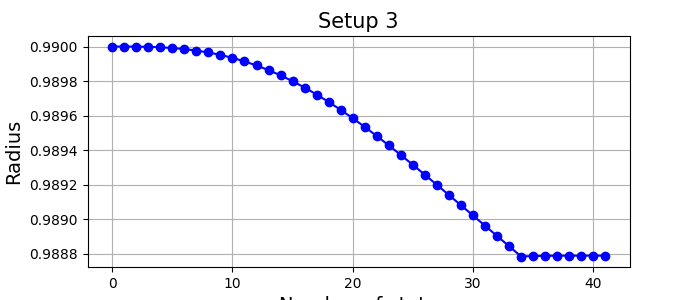

In [14]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radius , '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (42,) and (41,)

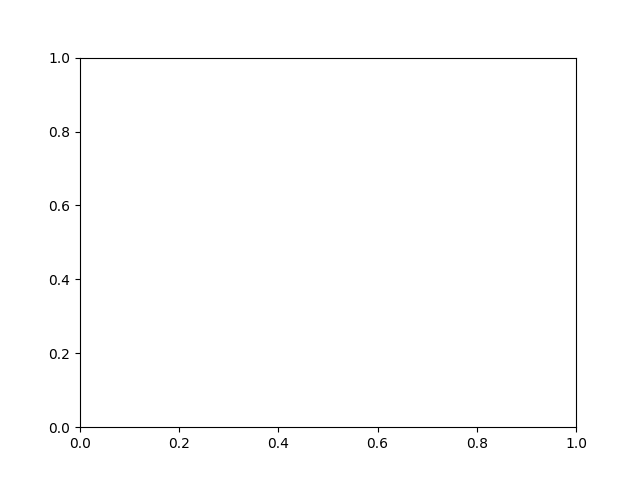

In [15]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,finaltiempotot, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)

# show the plot
plt.show()

In [ ]:
print(list_lambda_time[0:5])
print(vec_lambda[0:10])
len(list_lambda_time)

In [ ]:
list_lambda =  vec_lambda+list_lambda_time
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

## Testing with intermediary states

In the following cells we are going to use the geodesic that will give us some intermediary states in order to improve the control methodology

In [16]:
# Test values
#del(estadoslist, tiempolists, solution)
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.7, 0.8, 0.8])
qssf = 1/np.sqrt(3)*np.array([0.2, 0.9, 0.0])
w0 = 5

gamma_0 = 0.01
gamma_c = 10
Nmax = 30 ### with 20 is not working
imax = 7
deltat = 0.003

# Save initial and final states
auxri = qsri
auxsf = qssf

In [17]:
#numinter = 4 #number of intermediary states

numinter = 5 #number of intermediary states

#get the intermediary states from the geodesic
intermediaryqs=[geodesic((i)/(numinter-1),qsri,qssf) for i in range(numinter)]
intermediary = [bloch_vector(intermediaryqs[i]) for i in range(len(intermediaryqs)) ]
k = 1.0e-6
for i in range(numinter):
    delete_less_than_k(intermediary[i],k)

In [18]:
intermediary

[array([0.40414519+0.j, 0.46188022+0.j, 0.46188022+0.j]),
 array([0.34168337+0.j, 0.49297194+0.j, 0.3556096 +0.j]),
 array([0.27170149+0.j, 0.51321392+0.j, 0.24151243+0.j]),
 array([0.19573977+0.j, 0.52216066+0.j, 0.12209985+0.j]),
 array([0.11547005+0.j, 0.51961524+0.j, 0.        +0.j])]

In [19]:
solestes =[]
soltimes=[]
auxtime = 0.0
list_lambda = list([])
for i in range(numinter-1):
#for i in range(3):
    #print("run",i)
    estadoslist, tiempolists, solution, lambdavec = control1setup3_int_states(qsri,intermediary[i+1],Nmax=Nmax,initime=auxtime)
    #print(estadoslist)
    solestes=solestes+estadoslist
    soltimes=soltimes+tiempolists
    qsri=estadoslist[-1]
    #print(tiempolists[-1])
    auxtime=tiempolists[-1]
    list_lambda=list_lambda+lambdavec

In [20]:
list_lambda[0:10]

[241.731866935490,
 446.643406789587,
 1299.16531679228,
 1607.99092309701,
 247.994811070802,
 449.466401405568,
 1343.20014744079,
 889.053770434763,
 1036.55610254568,
 1132.13020750323]

## Using the $i_{max}$ loop and intermediary states

In [21]:
estadoslist=solestes ## reuse the varaible 
tiempolists = soltimes ## reuse the variable
solestes, soltimes, vec_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
list_lambda = list_lambda + vec_lambda_time

Find time with fidelity
New quantum state [ 0.11416345  0.55099681 -0.00212618]
Find time with fidelity
New quantum state [0.11390442 0.54961158 0.00372714]
Find time with fidelity
New quantum state [0.11791234 0.54460906 0.01017863]
Find time with fidelity
New quantum state [0.11693284 0.54488129 0.00563622]
Find time with fidelity
New quantum state [ 0.11610928  0.54018803 -0.00382732]
Find time with fidelity
New quantum state [1.15245461e-01 5.39522743e-01 3.29304894e-04]
Find time with fidelity
New quantum state [0.1152762  0.53845317 0.00387938]


In [22]:
list_lambda

[241.731866935490,
 446.643406789587,
 1299.16531679228,
 1607.99092309701,
 247.994811070802,
 449.466401405568,
 1343.20014744079,
 889.053770434763,
 1036.55610254568,
 1132.13020750323,
 1050.96076700159,
 1045.55864534659,
 1095.02903883869,
 1043.93442905272,
 1065.81512714191,
 1080.73452945266,
 1074.71118224839,
 1072.50431458763,
 1080.22728460875,
 1081.62201986001,
 1076.99580062483,
 1092.51855619012,
 1080.62294492294,
 1096.50145565300,
 1082.40096219930,
 1104.20901479019,
 1083.19886809522,
 1111.29935113699,
 1085.28370110049,
 1117.19202883726,
 1086.80584371639,
 1123.78297490443,
 1088.26229425889,
 1129.96557037618,
 1089.96164837263,
 182.305429045249,
 256.424835691007,
 419.126440564740,
 719.472411822233,
 691.995111840863,
 747.555788146859,
 768.171653097358,
 804.150645125091,
 831.873747284352,
 865.857449793998,
 897.517596350140,
 933.079695781328,
 968.056560385094,
 1006.26940196306,
 1044.50055700885,
 1085.98221628314,
 1127.58273278881,
 1172.949261

In [23]:
### for plots using intermediary states

# radius and fidelities
radiusint = [np.sqrt((solestes[i][0])**2+(solestes[i][1])**2+(solestes[i][2])**2) for i in range(len(solestes))]
listfidelitiesint=[fidelity(solestes[i],qssf) for i in range(len(solestes))]

In [24]:
### fidelity using intermediary states

fide_inter_1 = [fidelity(solestes[i],intermediary[1]) for i in range(len(solestes))]
fide_inter_2 = [fidelity(solestes[i],intermediary[2]) for i in range(len(solestes))]
fide_inter_3 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]

## Plots using intermediary states and setup 3

In [25]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,10],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(solestes)):
    b.add_points(solestes[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,auxri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
#for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
#    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,30],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    newbloch.add_points(vectorgeo[i],'s')

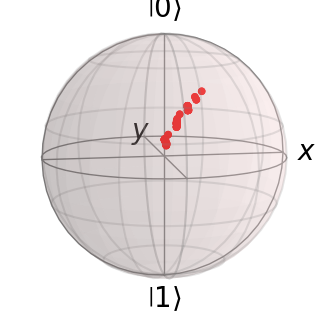

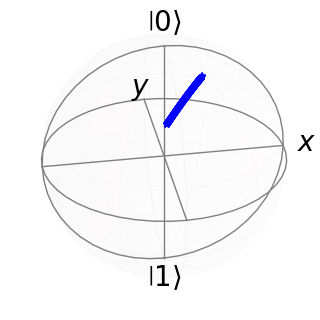

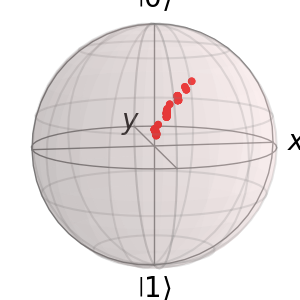

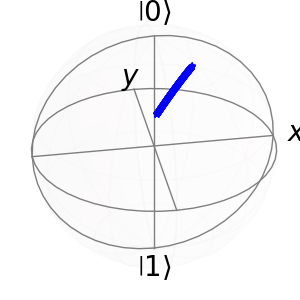

In [26]:
#improve plots
b.show()
newbloch.show()

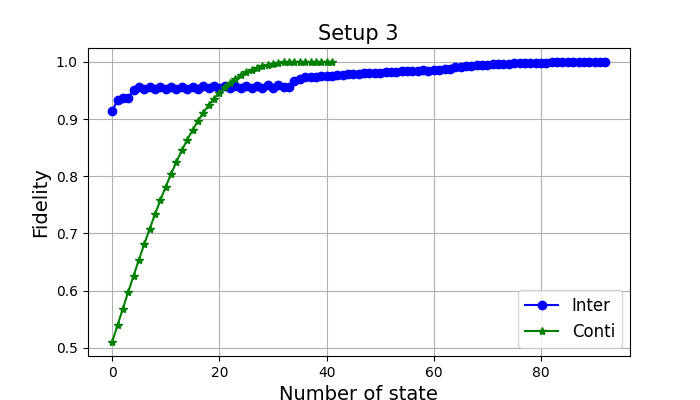

In [27]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelitiesint, '-o', color='blue',label="Inter")

#####################

# data without intermediary states
xaxis1 = [i for i in range(len(finalestados))]
ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

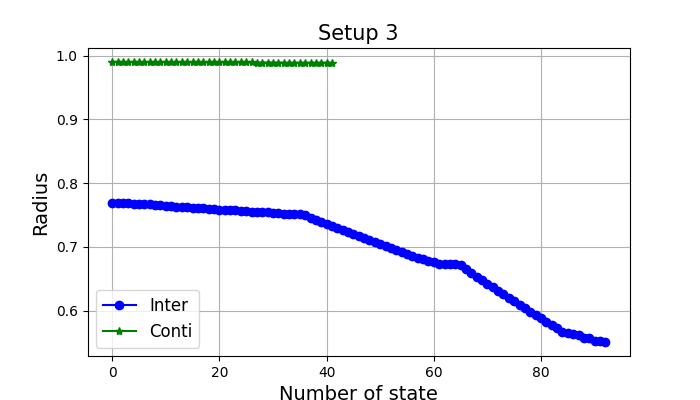

In [28]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radiusint, '-o', color='blue',label="Inter")
ax.plot(xaxis1, radius, '-*', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower left')
# show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (42,) and (41,)

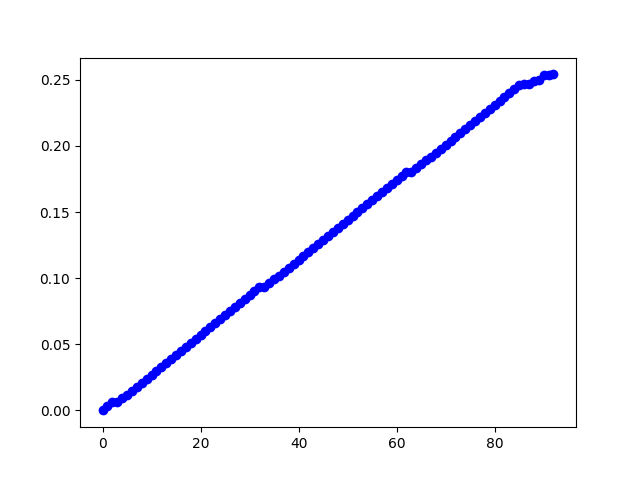

In [29]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,soltimes, '-o', color='blue',label="Inter")
ax.plot(xaxis1,finaltiempotot, '-o', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, fide_inter_1, '-o', color='blue',label="Inter1")
ax.plot(xaxis, fide_inter_2, '-o', color='green',label="Inter2")
ax.plot(xaxis, fide_inter_3, '-o', color='black',label="Inter3")


#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3, fidelity over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
list_lambda